## Loading Libraries

In [60]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm

import warnings


# For Data Visualization
import seaborn as sns 
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import missingno


# For remove warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv(r"C:\Users\User\Desktop\YouTube_ML\Diabet_Prediction\diabetes.csv")

In [62]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
# Lets look shape of data
print(" Number of rows: {} \n Number of columns: {} ".format(data.shape[0],data.shape[1]))

 Number of rows: 768 
 Number of columns: 9 


### Now lets Visualize to see we have missing data or not 

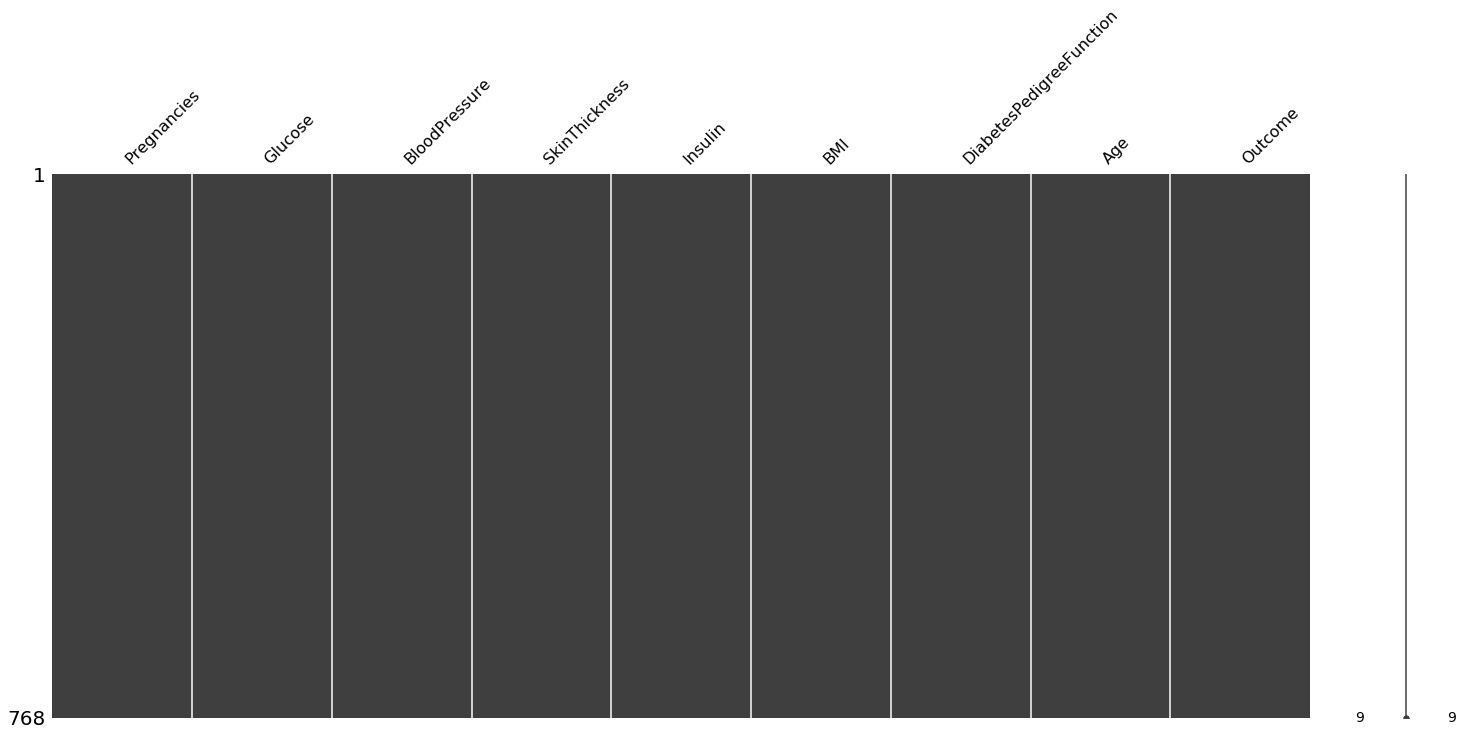

In [64]:
missingno.matrix(data)

### As we see there is not any missing data in our DF
### Now lets visualize our "Outcome" using piechart 

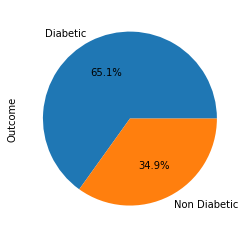

In [65]:
data.Outcome.value_counts().plot(kind = 'pie', labels = ["Diabetic","Non Diabetic"] ,autopct='%1.1f%%')

In [66]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
# There is no null values
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Binary Outcome means
* 0 for non Diabetic
* 1 for Diabetic

In [69]:
data.groupby("Outcome",as_index = False).mean().sort_values(by= "Outcome",ascending = True)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Now lets seperate data into X and Y

In [70]:
Y = data.Outcome
X = data.drop("Outcome", axis = 1)


### Data standardization


In [71]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
standardizat_data = scaler.transform(X)

In [73]:
standardizat_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [74]:
X = standardizat_data


### Now lets split our data into Training and Test

In [77]:
### Now time to train model 
classifier = svm.SVC(kernel = 'linear')

In [78]:
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [80]:
print("Accuracy score of the training data: ", training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


### Our model has accuracy score 78% on training data now lets check test data 

In [83]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [84]:
print("Accuracy score of the test data: ", test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


## Now lets check other model 
* LogisticRegression
* KNeighborsClassifier
* DecisionTreeClassifier
* GaussianNB
* SVC

In [86]:
# test options
num_folds = 10
seed = 7
scoring = 'accuracy'

In [88]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [89]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776917 (0.053007)
LDA: 0.776970 (0.050113)
KNN: 0.726520 (0.056940)
CART: 0.711793 (0.062914)
NB: 0.757351 (0.046837)
SVM: 0.767187 (0.043383)


### Making  Predictive System using input to find output

In [97]:
data[50:59]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
50,1,103,80,11,82,19.4,0.491,22,0
51,1,101,50,15,36,24.2,0.526,26,0
52,5,88,66,21,23,24.4,0.342,30,0
53,8,176,90,34,300,33.7,0.467,58,1
54,7,150,66,42,342,34.7,0.718,42,0
55,1,73,50,10,0,23.0,0.248,21,0
56,7,187,68,39,304,37.7,0.254,41,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0


In [108]:
# Lets choose row 58
input_data = (1,103,80,11,82,19.4,0.491,22)
np_input_data = np.asarray(input_data)
input_data_reshaped = np_input_data.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)


prediction = classifier.predict(std_data)
print(prediction)


[0]
